In [1]:
print("Loading Libraries...")
import os
import csv
import platform
import numpy as np
from scipy.fftpack import fft
import pandas as pd
import dask.dataframe as dd
import math
import matplotlib.pyplot as plt
print("Loaded Libraries...")

Loading Libraries...
Loaded Libraries...


In [2]:
valid = 'C:/Users/JMosiezny/Documents/01_PUT/01_DOKTORAT/13_PLGRID/noise-data/int-01-post/valid'

In [3]:
os.chdir(valid)
signal = pd.read_csv('int-01_acu_node_90.dat', delimiter=",", decimal='.',usecols=["sound-pressure"])

In [4]:
signal

,sound-pressure
0,6.487979
1,6.464539
2,6.417659
3,6.355159
4,6.269219
5,6.159849
6,6.027039
7,5.902039
8,5.761409
9,5.605159


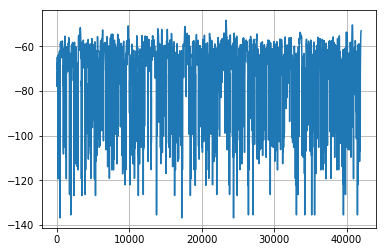

In [19]:
T_test = 0.050150  # Duration in seconds
#f0_test = 100  # Fundamental frequency
Fs_test = 42001  # Sampling frequency

# Time domain signal
#t_test = np.arange(0, T_test*Fs_test)/Fs_test
#x_test = np.sin(2*np.pi*f0_test*t_test)
N_test = signal.size

# DFT
X_test = np.fft.fft(signal)
X_db_test = 20*np.log10(2*np.abs(X_test)/N_test)
#f = np.fft.fftfreq(N, 1/Fs)
f_test = np.arange(0, N_test)*Fs_test/N_test

plt.plot(f_test, X_db_test)
plt.grid()
plt.show()

In [6]:
N_test

50150

In [7]:
X_test

array([[  6.48797876+0.j],
       [  6.46453876+0.j],
       [  6.41765876+0.j],
       ..., 
       [-55.76984124+0.j],
       [-55.84796124+0.j],
       [-55.92609124+0.j]])